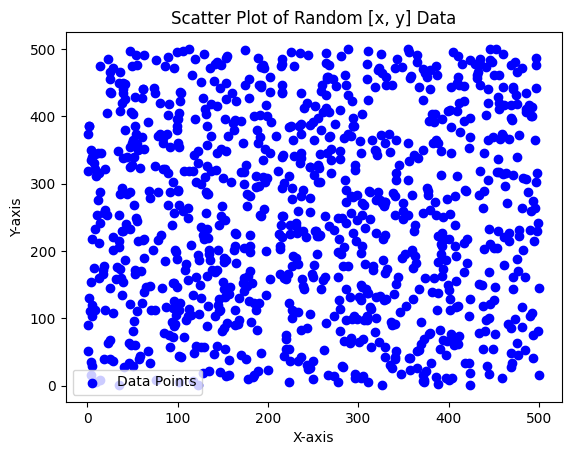

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


# 무작위로 [x, y] 좌표 데이터 생성
np.random.seed(42)
data_points = 1000
coordinates = np.random.randint(1, 501, size=(data_points, 2))

# Scatter plot 그리기
plt.scatter(coordinates[:, 0], coordinates[:, 1], marker='o', color='blue', label='Data Points')

# 그래프에 라벨 등 추가
plt.title('Scatter Plot of Random [x, y] Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# 그래프 보여주기
plt.show()



In [32]:
coordinates = torch.tensor(coordinates, dtype=torch.float32)
mean = torch.mean(coordinates, dim=0)

In [33]:
covariance_matrix = torch.matmul((coordinates - mean).t(), (coordinates - mean)) / (coordinates.size(0) - 1)

In [34]:
mean, covariance_matrix

(tensor([245.3290, 252.9190]),
 tensor([[20536.0215,   431.2950],
         [  431.2950, 20690.8789]]))

In [16]:
from torch.distributions import MultivariateNormal
multivariate_distribution = MultivariateNormal(mean, covariance_matrix)

In [18]:
test_point = torch.tensor([[100.0, 200.0]], dtype=torch.float32)  # 예시로 (100, 200) 좌표를 사용

# 주어진 좌표에 대한 확률 계산
probability = multivariate_distribution.log_prob(test_point).exp()

print(f'Probability at {test_point.numpy()}: {probability.item()}')


Probability at [[100. 200.]]: 4.199001068627695e-06


In [19]:
np.random.seed(42)
data_points = 10000
coordinates = np.random.randint(1, 501, size=(data_points, 2))
coordinates_tensor = torch.tensor(coordinates, dtype=torch.float32)

# 평균과 공분산 계산
mean = torch.mean(coordinates_tensor, dim=0)
covariance_matrix = torch.matmul((coordinates_tensor - mean).t(), (coordinates_tensor - mean)) / (coordinates_tensor.size(0) - 1)

# 다변량 정규분포 생성
multivariate_distribution = MultivariateNormal(mean, covariance_matrix)

# 특정 좌표에 대한 확률 계산
test_point = torch.tensor([[100.0, 200.0]], dtype=torch.float32)
probability = multivariate_distribution.log_prob(test_point).exp()

print(f'Probability at {test_point.numpy()}: {probability.item()}')

Probability at [[100. 200.]]: 4.199001068627695e-06


In [27]:
import numpy as np
from scipy.stats import multivariate_normal

# 가상의 다변량 가우시안 모델 생성
np.random.seed(42)

# 가상의 훈련 데이터 생성 (다변량 정규분포를 따르는)
mean_vector = np.array([200, 300])
covariance_matrix = np.array([[100, 50], [50, 100]])
train_data = np.random.multivariate_normal(mean_vector, covariance_matrix, size=1000)

# 모델 훈련
model = multivariate_normal(mean=mean_vector, cov=covariance_matrix)

# 새로운 입력에 대한 확률 계산
new_input = np.array([200, 300])
probability = model.pdf(new_input)

# 확률 출력
print(f"입력 {new_input}이 나타날 확률: {probability}")


입력 [200 300]이 나타날 확률: 0.001837762984739307


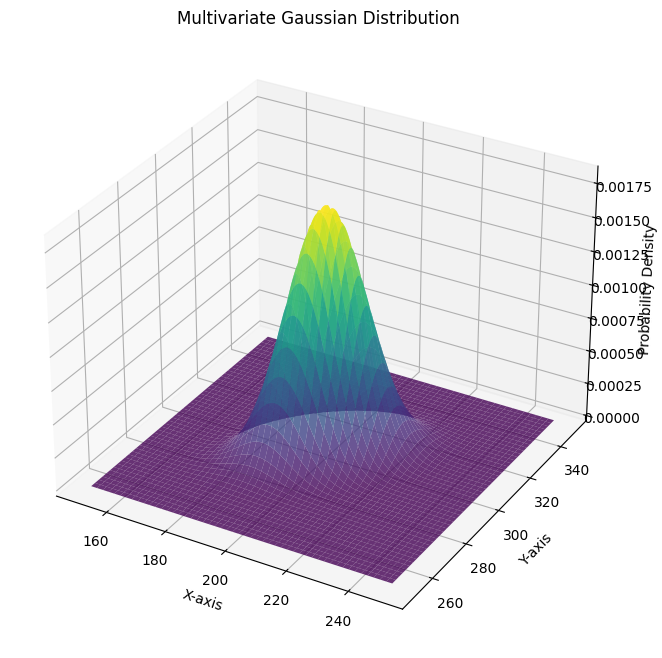

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# 가상의 다변량 가우시안 모델 생성
mean_vector = np.array([200, 500])
covariance_matrix = np.array([[100, 50], [50, 100]])
model = multivariate_normal(mean=mean_vector, cov=covariance_matrix)

# 등고선을 표시할 범위 생성
x, y = np.mgrid[150:250:.1, 250:350:.1]
pos = np.dstack((x, y))

# 등고선 값 계산
pdf_values = model.pdf(pos)

# 3D 그래프 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, pdf_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Probability Density')

plt.title('Multivariate Gaussian Distribution')
plt.show()


In [37]:
from sklearn.linear_model import BayesianRidge
import numpy as np

# Assuming you have features X and target variable y
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([3, 7, 11])

# Fit the Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X, y)

# Make predictions along with uncertainty
predictions, std_dev = model.predict(X, return_std=True)

# Print predictions and standard deviations
for pred, std in zip(predictions, std_dev):
    print(f"Prediction: {pred}, Standard Deviation: {std}")


Prediction: 3.000000125, Standard Deviation: 1.000000124951824
Prediction: 7.0, Standard Deviation: 1.0000007499509085
Prediction: 10.999999875, Standard Deviation: 1.0000018749482749


In [41]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np

# Generate synthetic data
np.random.seed(42)
X_train = np.random.rand(50, 1) * 10
y_train = np.sin(X_train) + 0.1 * np.random.randn(50, 1)

# Fit Gaussian Process Regression model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
model.fit(X_train, y_train)

# Define test points
X_test = np.linspace(0, 10, 100).reshape(-1, 1)

# Make predictions along with uncertainty
mean_predictions, std_dev = model.predict(X_test, return_std=True)

# Print predictions and uncertainties for a few test points
for i in range(5):
    print(f"Input: {X_test[i][0]}, Prediction: {mean_predictions[i]}, Standard Deviation: {std_dev[i]}")


# You can also obtain percentiles from the predicted distribution
percentiles = np.percentile(model.sample_y(X_test, n_samples=1000), q=[10, 50, 90], axis=1)
for i in range(5):
    print(f"Input: {X_test[i][0]}, 10th Percentile: {percentiles[0][i]}, Median: {percentiles[1][i]}, 90th Percentile: {percentiles[2][i]}")


Input: 0.0, Prediction: 2.314475541972381e-93, Standard Deviation: 0.8117830544488248
Input: 0.10101010101010101, Prediction: 3.2296670979226417e-25, Standard Deviation: 0.8117830544488248
Input: 0.20202020202020202, Prediction: 0.2201004945401733, Standard Deviation: 0.29946960118710353
Input: 0.30303030303030304, Prediction: 0.00011514085497292816, Standard Deviation: 0.8117830315665784
Input: 0.40404040404040403, Prediction: 1.1145082020968289e-08, Standard Deviation: 0.8117830544488247
Input: 0.0, 10th Percentile: -0.9744877204857082, Median: 0.05556349687175939, 90th Percentile: 1.1085887768471738
Input: 0.10101010101010101, 10th Percentile: -0.9828864859753099, Median: 0.02149718464656706, 90th Percentile: 1.1283207125841397
Input: 0.20202020202020202, 10th Percentile: -0.16992534841372278, Median: 0.21948060004498754, 90th Percentile: 0.6182487368327594
Input: 0.30303030303030304, 10th Percentile: -0.9811016803962435, Median: -0.019725179886592014, 90th Percentile: 1.03462404297

c:\Users\KHU\anaconda3\envs\py3_8_5\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [43]:
import torch
from torch.utils.data import Dataset, DataLoader

class AccelerometerDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Assuming you have your accelerometer data (accel_data) and corresponding coordinates (coordinates)
# Replace this with your actual data loading process
accel_data = torch.randn(700, 3, 20)
coordinates = torch.randn(700, 2)

# Create a dataset and a data loader
dataset = AccelerometerDataset(accel_data, coordinates)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)


In [47]:
import torch
import torch.nn as nn
import pyro
import pyro.distributions as dist
from torch.nn.functional import relu
from torch.utils.data import Dataset, DataLoader

# Define a Bayesian neural network (BNN)
class BNN(nn.Module):
    def __init__(self):
        super(BNN, self).__init__()
        self.fc1 = nn.Linear(60, 50)
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        x = x.view(-1, 60)  # Flatten the input
        x = relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define a simple dataset
class AccelerometerDataset(Dataset):
    def __init__(self, data, coordinates):
        self.data = data
        self.coordinates = coordinates

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.coordinates[idx]

# Create synthetic data
accel_data = torch.randn(700, 3, 20)
coordinates = torch.randn(700, 2)

# Create a dataset and a data loader
dataset = AccelerometerDataset(accel_data, coordinates)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define the Bayesian model using Pyro
def model(accel_data, coordinates):
    bnn = BNN()
    priors = {}
    for name, param in bnn.named_parameters():
        priors[name] = dist.Normal(torch.zeros_like(param), 1.0).to_event(1)

    lifted_module = pyro.random_module("module", bnn, priors)
    lifted_bnn = lifted_module()

    with pyro.plate("data", len(accel_data), dim=-2):
        prediction = lifted_bnn(accel_data)
        
        # Split the prediction into x and y coordinates
        prediction_x = prediction[:, 0]
        prediction_y = prediction[:, 1]

        # Assuming Gaussian likelihood for each coordinate
        pyro.sample("obs_x", dist.Normal(prediction_x, 0.1), obs=coordinates[:, 0])
        pyro.sample("obs_y", dist.Normal(prediction_y, 0.1), obs=coordinates[:, 1])

# Define the guide for variational inference
def guide(accel_data, coordinates):
    bnn = BNN()
    priors = {}
    for name, param in bnn.named_parameters():
        mu = pyro.param(name + '_mu', torch.randn_like(param))
        sigma = pyro.param(name + '_sigma', torch.randn_like(param))
        priors[name] = dist.Normal(mu, torch.nn.functional.softplus(sigma)).to_event(1)

    lifted_module = pyro.random_module("module", bnn, priors)
    return lifted_module()

# Use SVI for training
svi = pyro.infer.SVI(model, guide, pyro.optim.Adam({"lr": 0.01}), loss=pyro.infer.Trace_ELBO())

num_iterations = 1000
for j in range(num_iterations):
    for accel_batch, coord_batch in data_loader:
        # Training step
        loss = svi.step(accel_batch, coord_batch)

# After training, you can use the model for prediction and uncertainty estimation
predictive = pyro.infer.Predictive(model, guide=guide, num_samples=1000, return_sites=("obs_x", "obs_y", "_RETURN"))
predictions = predictive(accel_data)

# Access the percentiles or other statistics of the predictions
percentiles_x = torch.percentile(predictions["_RETURN"][:, :, 0], q=[10, 50, 90], dim=0)
percentiles_y = torch.percentile(predictions["_RETURN"][:, :, 1], q=[10, 50, 90], dim=0)

# Print the results
for i in range(5):
    print(f"Input Acceleration Data: {accel_data[i]}")
    print(f"True Coordinates: {coordinates[i]}")
    print(f"Predicted Coordinates (x): {percentiles_x[1][i]}, 10th Percentile: {percentiles_x[0][i]}, 90th Percentile: {percentiles_x[2][i]}")
    print(f"Predicted Coordinates (y): {percentiles_y[1][i]}, 10th Percentile: {percentiles_y[0][i]}, 90th Percentile: {percentiles_y[2][i]}")
    print()


ValueError: at site "module$$$fc1.weight", invalid log_prob shape
  Expected [], actual [50]
  Try one of the following fixes:
  - enclose the batched tensor in a with pyro.plate(...): context
  - .to_event(...) the distribution being sampled
  - .permute() data dimensions